In [1]:
import os
import logging
# logging.basicConfig(
#     format='[%(pathname)s:%(lineno)d] %(message)s',
#     level=logging.DEBUG
# )
import time
import datetime as dt
import tqdm.auto as tqdm
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [6]:
TEST_TICKER = 'TLT'
# TEST_TICKER = 'CTAS'
# TEST_TICKER = 'BF-B'
HIST_START_DATE = dt.date(2015, 1, 1)
TEST_TICKER, HIST_START_DATE

('TLT', datetime.date(2015, 1, 1))

In [23]:
ticker = yf.Ticker(TEST_TICKER)
# ticker = yf.Ticker('SCHD')
hist_raw: pd.DataFrame = ticker.history(
    interval='1d',
    start=HIST_START_DATE,
    end=dt.date(2025,3,13)
)
print(list(hist_raw.columns))
hist_raw

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains']


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,97.521095,98.579011,97.412987,98.316460,9432000,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,98.849256,100.100227,98.810650,99.860847,9789500,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,100.926531,102.308775,100.532713,101.660118,18331300,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,100.926500,101.907197,100.517235,101.459320,9762900,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,100.663982,100.671700,99.938112,100.115715,8055300,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,90.480003,90.800003,89.730003,90.400002,42827500,0.0,0.0,0.0
2025-03-07 00:00:00-05:00,91.139999,91.160004,89.989998,90.110001,36903600,0.0,0.0,0.0
2025-03-10 00:00:00-04:00,91.080002,91.629997,90.910004,91.050003,41440800,0.0,0.0,0.0


In [24]:
hist_raw.index = hist_raw.index.date
hist_raw.index.name = 'Date'
hist_raw.drop(['Stock Splits', 'Capital Gains'], axis=1, inplace=True)
hist_raw

,Open,High,Low,Close,Volume,Dividends
Date,,,,,,
2015-01-02,97.521095,98.579011,97.412987,98.316460,9432000,0.0
2015-01-05,98.849256,100.100227,98.810650,99.860847,9789500,0.0
2015-01-06,100.926531,102.308775,100.532713,101.660118,18331300,0.0
2015-01-07,100.926500,101.907197,100.517235,101.459320,9762900,0.0
2015-01-08,100.663982,100.671700,99.938112,100.115715,8055300,0.0
...,...,...,...,...,...,...
2025-03-06,90.480003,90.800003,89.730003,90.400002,42827500,0.0
2025-03-07,91.139999,91.160004,89.989998,90.110001,36903600,0.0
2025-03-10,91.080002,91.629997,90.910004,91.050003,41440800,0.0


In [28]:
hist_raw.iloc[15:]

,Open,High,Low,Close,Volume,Dividends
Date,,,,,,
2015-01-26,104.123391,104.393666,103.513359,103.752739,5966500,0.0
2015-01-27,104.810706,105.119593,103.590628,103.914963,8079600,0.0
2015-01-28,104.053960,106.108015,104.015348,105.613808,12230300,0.0
2015-01-29,105.111843,105.536555,104.602200,104.918793,8881400,0.0
2015-01-30,106.339706,106.949739,105.930429,106.779854,14871200,0.0
...,...,...,...,...,...,...
2025-03-06,90.480003,90.800003,89.730003,90.400002,42827500,0.0
2025-03-07,91.139999,91.160004,89.989998,90.110001,36903600,0.0
2025-03-10,91.080002,91.629997,90.910004,91.050003,41440800,0.0


In [9]:
hist_raw['Dividends'].value_counts()

Dividends
0.000    2441
0.267       5
0.275       5
0.255       5
0.263       4
         ... 
0.313       1
0.316       1
0.325       1
0.351       1
0.290       1
Name: count, Length: 78, dtype: int64

In [31]:
def adjust_dividend_reinvest(df: pd.DataFrame, price_col='Close', div_col='Dividends'):
    cur_share = 1
    adj_ = []
    shares_ = []
    for dividend, price in zip(df[div_col], df[price_col]):
        if dividend > 0:
            cur_share += (cur_share * dividend) / price

        adj_.append(cur_share * price)
        shares_.append(cur_share)

    return adj_, shares_


In [32]:
adj, shares = adjust_dividend_reinvest(hist_raw)
len(adj)

2563

In [34]:
hist_raw['AdjClose'] = adj
hist_raw['Shares'] = shares
hist_raw

,Open,High,Low,Close,Volume,Dividends,AdjClose,Shares
Date,,,,,,,,
2015-01-02,97.521095,98.579011,97.412987,98.316460,9432000,0.0,98.316460,1.000000
2015-01-05,98.849256,100.100227,98.810650,99.860847,9789500,0.0,99.860847,1.000000
2015-01-06,100.926531,102.308775,100.532713,101.660118,18331300,0.0,101.660118,1.000000
2015-01-07,100.926500,101.907197,100.517235,101.459320,9762900,0.0,101.459320,1.000000
2015-01-08,100.663982,100.671700,99.938112,100.115715,8055300,0.0,100.115715,1.000000
...,...,...,...,...,...,...,...,...
2025-03-06,90.480003,90.800003,89.730003,90.400002,42827500,0.0,121.361228,1.342491
2025-03-07,91.139999,91.160004,89.989998,90.110001,36903600,0.0,120.971905,1.342491
2025-03-10,91.080002,91.629997,90.910004,91.050003,41440800,0.0,122.233850,1.342491


In [27]:
# ctas = yf.Ticker('CTAS')
# ctas.history(
#     interval='1d',
#     start=HIST_START_DATE
# )

In [42]:
hist = hist_raw.copy(deep=True)
hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
hist.reset_index(inplace=True)
hist['Date'] = pd.to_datetime(hist['Date']).dt.date
hist['hlc3'] = (hist['Open'] + hist['High'] + hist['Close']) / 3
hist['log_hlc3'] = np.log(hist['hlc3'])
hist

,Date,Open,High,Low,Close,Volume,Capital Gains,hlc3,log_hlc3
0,2015-01-02,11.644329,11.682239,11.556843,11.609335,1418700,0.0,11.645301,2.454903
1,2015-01-05,11.565595,11.577259,11.434366,11.446031,12067500,0.0,11.529628,2.444920
2,2015-01-06,11.463526,11.524766,11.326466,11.376040,1611300,0.0,11.454778,2.438407
3,2015-01-07,11.478108,11.521851,11.431449,11.510186,3470700,0.0,11.503382,2.442641
4,2015-01-08,11.612252,11.728900,11.591839,11.723067,3114600,0.0,11.688073,2.458569
...,...,...,...,...,...,...,...,...,...
2558,2025-03-06,27.950001,28.100000,27.790001,28.070000,14871800,0.0,28.040000,3.333632
2559,2025-03-07,28.030001,28.510000,28.010000,28.459999,16558700,0.0,28.333333,3.344039
2560,2025-03-10,28.320000,28.850000,28.190001,28.379999,23520500,0.0,28.516666,3.350489
2561,2025-03-11,28.299999,28.309999,27.660000,27.740000,24564600,0.0,28.116666,3.336363


In [29]:
hist_a = hist.copy()
hist_a

,Date,Open,High,Low,Close,Volume,hlc3,log_hlc3
0,2015-01-02,24.778677,24.789800,23.879980,24.320431,212818400,24.629636,3.203950
1,2015-01-05,24.089084,24.169166,23.448429,23.635286,257142000,23.964512,3.176574
2,2015-01-06,23.699796,23.897776,23.274916,23.637510,263188400,23.745027,3.167373
3,2015-01-07,23.846619,24.069069,23.735394,23.968967,160423600,23.961552,3.176451
4,2015-01-08,24.298189,24.947741,24.180289,24.889904,237458000,24.711945,3.207287
...,...,...,...,...,...,...,...,...
2558,2025-03-06,234.440002,237.860001,233.160004,235.330002,45170400,235.876668,5.463309
2559,2025-03-07,235.110001,241.369995,234.759995,239.070007,46273600,238.516668,5.474439
2560,2025-03-10,235.539993,236.160004,224.220001,227.479996,72071200,233.059998,5.451296
2561,2025-03-11,223.809998,225.839996,217.449997,220.839996,76137400,223.496663,5.409396


In [24]:
hist_b = hist.copy()
hist_b

,Date,Open,High,Low,Close,Volume,hlc3,log_hlc3
0,2015-01-02,0.483099,0.486699,0.475420,0.483099,113680000,0.484299,-0.725052
1,2015-01-05,0.483099,0.484539,0.472780,0.474939,197952000,0.480859,-0.732181
2,2015-01-06,0.475659,0.476139,0.460060,0.460540,197764000,0.470780,-0.753365
3,2015-01-07,0.463900,0.467980,0.457900,0.459340,321808000,0.463740,-0.768431
4,2015-01-08,0.464620,0.479499,0.464380,0.476619,283780000,0.473580,-0.747435
...,...,...,...,...,...,...,...,...
2558,2025-03-06,113.519557,115.339389,110.209863,110.559830,321181900,113.139592,4.728622
2559,2025-03-07,111.239772,113.469570,107.550108,112.679642,341755500,112.462994,4.722624
2560,2025-03-10,109.889891,111.839709,105.450297,106.970161,366487400,109.566587,4.696532
2561,2025-03-11,106.980159,112.229676,104.760361,108.750000,354865700,109.319945,4.694279


In [37]:
aapl = hist_a[['Date', 'hlc3']].rename(columns={'hlc3': 'AAPL_hlc3'})
nvda = hist_b[['Date', 'hlc3']].rename(columns={'hlc3': 'NVDA_hlc3'})
# nvda

merge = pd.merge(aapl, nvda)
merge

,Date,AAPL_hlc3,NVDA_hlc3
0,2015-01-02,24.629636,0.484299
1,2015-01-05,23.964512,0.480859
2,2015-01-06,23.745027,0.470780
3,2015-01-07,23.961552,0.463740
4,2015-01-08,24.711945,0.473580
...,...,...,...
2558,2025-03-06,235.876668,113.139592
2559,2025-03-07,238.516668,112.462994
2560,2025-03-10,233.059998,109.566587
2561,2025-03-11,223.496663,109.319945


In [39]:
merge[['AAPL_hlc3', 'NVDA_hlc3']].corr()

,AAPL_hlc3,NVDA_hlc3
AAPL_hlc3,1.000000,0.813342
NVDA_hlc3,0.813342,1.000000


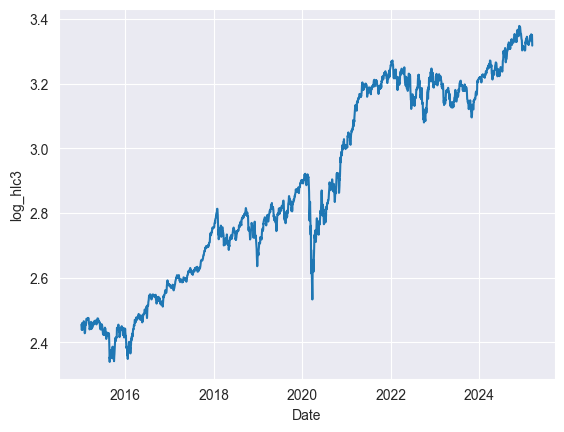

In [43]:
sns.lineplot(hist, x='Date', y='log_hlc3')
plt.show()

In [ ]:
stmt = ticker.get_income_stmt(freq='quarterly').T
stmt

In [ ]:
list(sorted(stmt.columns))

In [ ]:
sns.lineplot(hist, x='Date', y='log_hlc3')
sns.lineplot(stmt, x=stmt.index, y='BasicEPS')
plt.show()

In [ ]:
stmt2 = pd.read_csv('resources/NVDA.csv')
stmt2.drop(['period', 'act_symbol'], axis=1, inplace=True)
stmt2

In [ ]:
list(sorted(stmt2.columns))

In [ ]:
sns.lineplot(hist, x='Date', y='log_hlc3')
sns.lineplot(stmt2, x='date', y='BasicEPS')
plt.show()